# Chem 277B - Fall 2024 - Homework 1 
## Naive Bayes and PCA
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Sept 23 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**<br>
<br>
## Problem (25 P)

Write a Python script **AnalyzeMolecules** using *def*, that performs the following analysis:<br>
<br>
1) Loading the molecule data set *"molecular_test_gbc.xlsx"* and *"molecular_train_gbc.xlsx"*<br>
2) Creating a plot showing Pearsons' correlation of all features in *"molecular_train_gbc.xlsx"* in a heatmap (see Fig 1)<br>
3) Running a classification using **Naive Bayes**, both with a Multinomial Prior and Gaussian Prior. Don't forget scaling and normalization!<br>
4) Running the same classification as in 3) but after having performed a PCA. How does the accuracy change?<br>
5) Creating a bar plot of the eigenvalue spectrum and a scatter plot for the data in those coordinates with the three largest eigenvalues (see Fig 2 and 3, respectively)
   

In [1]:
#base environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#import matplotlib.pyplot as mp
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler


# Load molecular data sets

In [2]:
#load in molecular data sets
molecular_test = pd.read_csv("data_277b_HW/molecular_test_gbc.csv")
molecular_train = pd.read_csv("data_277b_HW/molecular_train_gbc.csv")

print(f"This is the shape of molecular test: {molecular_test.shape}")
print(f"This is the shape of molecular train: {molecular_train.shape}")

#molecular_test


This is the shape of molecular test: (200, 6)
This is the shape of molecular train: (800, 6)


# Heat Map

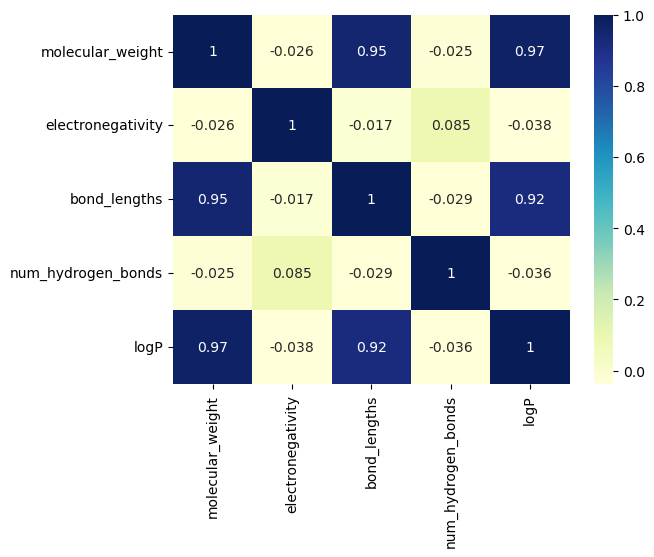

In [4]:
#looked at geek for geeks how to make heat map

data_plot = sb.heatmap(molecular_train.corr(numeric_only=True), cmap = "YlGnBu", annot = True)

plt.show()

## Combine test and train, scale and normalize

In [5]:
m_test_features = molecular_test.drop(columns ='label')
# m_test_features = m_test_features.drop(index=0)
#display(m_test_features)

m_train_features = molecular_train.drop(columns ='label')
#display(m_train_features)

all = pd.concat((m_test_features, m_train_features), axis = 0)

(rows, _) = molecular_train.shape

normalizer = Normalizer()
scaler = MinMaxScaler(feature_range=(0,1))
alls = scaler.fit_transform(all)


allsn = normalizer.fit_transform(alls)

# scaled and normalized
m_train_sn = pd.DataFrame(allsn[:rows,:], columns = m_train_features.columns)
m_test_sn = pd.DataFrame(allsn[rows:,:], columns = m_test_features.columns)




# Naive Bayes, Gaussian

In [6]:
#Naive Bayes, Gaussian NB
#Gaussian prior https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
#https://www.youtube.com/watch?v=Q93IWdj5Td4&t=329s

#all the features for each case
x_test = m_test_sn

#y_test is the label column
y_test = molecular_test["label"]

#get all features of x_train except the label column
x_train = m_train_sn
#get the label column from y_train
y_train = molecular_train['label']

#classifier = gaussian naive bayes
clf = GaussianNB()
clf.fit(x_train, y_train)


y_prediction =clf.predict(x_test)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

   Non-Toxic       0.53      0.26      0.35        97
       Toxic       0.53      0.79      0.63       103

    accuracy                           0.53       200
   macro avg       0.53      0.52      0.49       200
weighted avg       0.53      0.53      0.49       200



## Naive Bayes, multinomial

In [7]:
#used scikitlearn https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
#https://www.geeksforgeeks.org/multinomial-naive-bayes/

x_test = m_test_sn

#y_test is the label column
y_test = molecular_test["label"]

#get all features of x_train except the label column
x_train = m_train_sn
#get the label column from y_train
y_train = molecular_train['label']

#classifier = gaussian naive bayes
clf = MultinomialNB(alpha = 1)
clf.fit(x_train, y_train)


y_prediction =clf.predict(x_test)
print(classification_report(y_test,y_prediction, zero_division = 0))



              precision    recall  f1-score   support

   Non-Toxic       0.00      0.00      0.00        97
       Toxic       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200



## Perform PCA

In [9]:
#https://www.geeksforgeeks.org/principal-component-analysis-with-python/

from sklearn.decomposition import PCA


m_train_sn_arr = np.array(m_train_sn)
m_test_sn_arr = np.array(m_test_sn)

out = PCA(n_components = 5).fit(m_train_sn_arr)

eigenVec = out.components_
eigenVal = out.explained_variance_

x_train_pca = out.transform(m_train_sn_arr)
x_test_pca = out.transform(m_test_sn_arr)

print(eigenVec)
print(np.dot(eigenVec[:,0], eigenVec[:,0] )) #normalizes vector to one
print(np.dot(eigenVec[:,2], eigenVec[:,1] )) #returns zero meaning they are orthagonal/perpindicular
print(eigenVal)

[[-0.27326959 -0.11486771 -0.2811486   0.87478529 -0.2604521 ]
 [-0.27968067  0.83823629 -0.33229364 -0.16848257 -0.28343114]
 [-0.24629168 -0.49006862 -0.71982972 -0.40827573 -0.1197049 ]
 [-0.40451642 -0.20973344  0.51056465 -0.19869825 -0.7015847 ]
 [ 0.78918269 -0.00315745 -0.17805986  0.01393756 -0.58760628]]
1.0
2.275414186254231e-16
[0.07872636 0.03301955 0.00259968 0.00180487 0.00050387]


## Rerun Gaussian NB after PCA

In [10]:

#y_test is the label column
y_test = molecular_test["label"]

#get the label column from y_train
y_train = molecular_train['label']

#classifier = gaussian naive bayes
clf = GaussianNB()
clf.fit(x_train_pca, y_train)


y_prediction =clf.predict(x_test_pca)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

   Non-Toxic       0.55      0.29      0.38        97
       Toxic       0.54      0.78      0.63       103

    accuracy                           0.54       200
   macro avg       0.54      0.53      0.51       200
weighted avg       0.54      0.54      0.51       200



## Rerun Multinomial NB after PCA

In [104]:
#had to scale because I was getting negative numbers putting in x_train_pca and x_test_pca
#multinomial NB wont take negative values
x_train_pca_scaled = scaler.fit_transform(x_train_pca)
x_test_pca_scaled = scaler.fit_transform(x_test_pca)

x_test = x_test_pca_scaled

#y_test is the label column
y_test = molecular_test["label"]

#get all features of x_train except the label column
x_train = x_train_pca_scaled
#get the label column from y_train
y_train = molecular_train['label']

#classifier = gaussian naive bayes
clf = MultinomialNB(alpha = 1)
clf.fit(x_train_pca_scaled, y_train)


y_prediction =clf.predict(x_test_pca_scaled)
print(classification_report(y_test,y_prediction, zero_division = 0))



              precision    recall  f1-score   support

   Non-Toxic       0.00      0.00      0.00        97
       Toxic       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200



## Create a bar plot of the eigenvalue spectrum

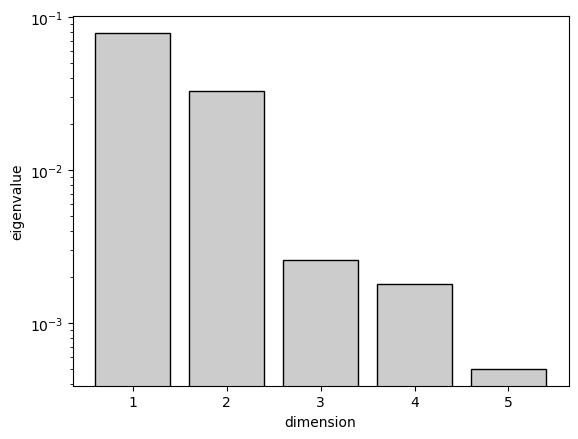

In [98]:
xplot = np.arange(1,6)

plt.bar(xplot, eigenVal, color = (0.8, 0.8, 0.8), edgecolor = 'black')
plt.xlabel('dimension')
plt.ylabel('eigenvalue')
plt.yscale('log')
plt.xticks(xplot)
plt.show()

## Create a scatter plot for the data in those coordinates with the three largest eigenvalues

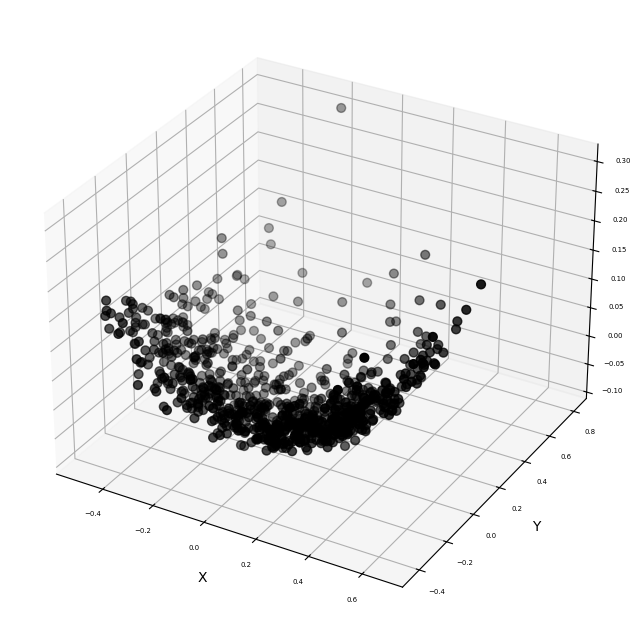

In [87]:
# standard3D plot

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train_pca[:,0], x_train_pca[:,1], x_train_pca[:,2], c = 'black', marker = 'o', s = 40)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis = 'both', which = 'major', labelsize = 5)
plt.show()

**Fig 1:**
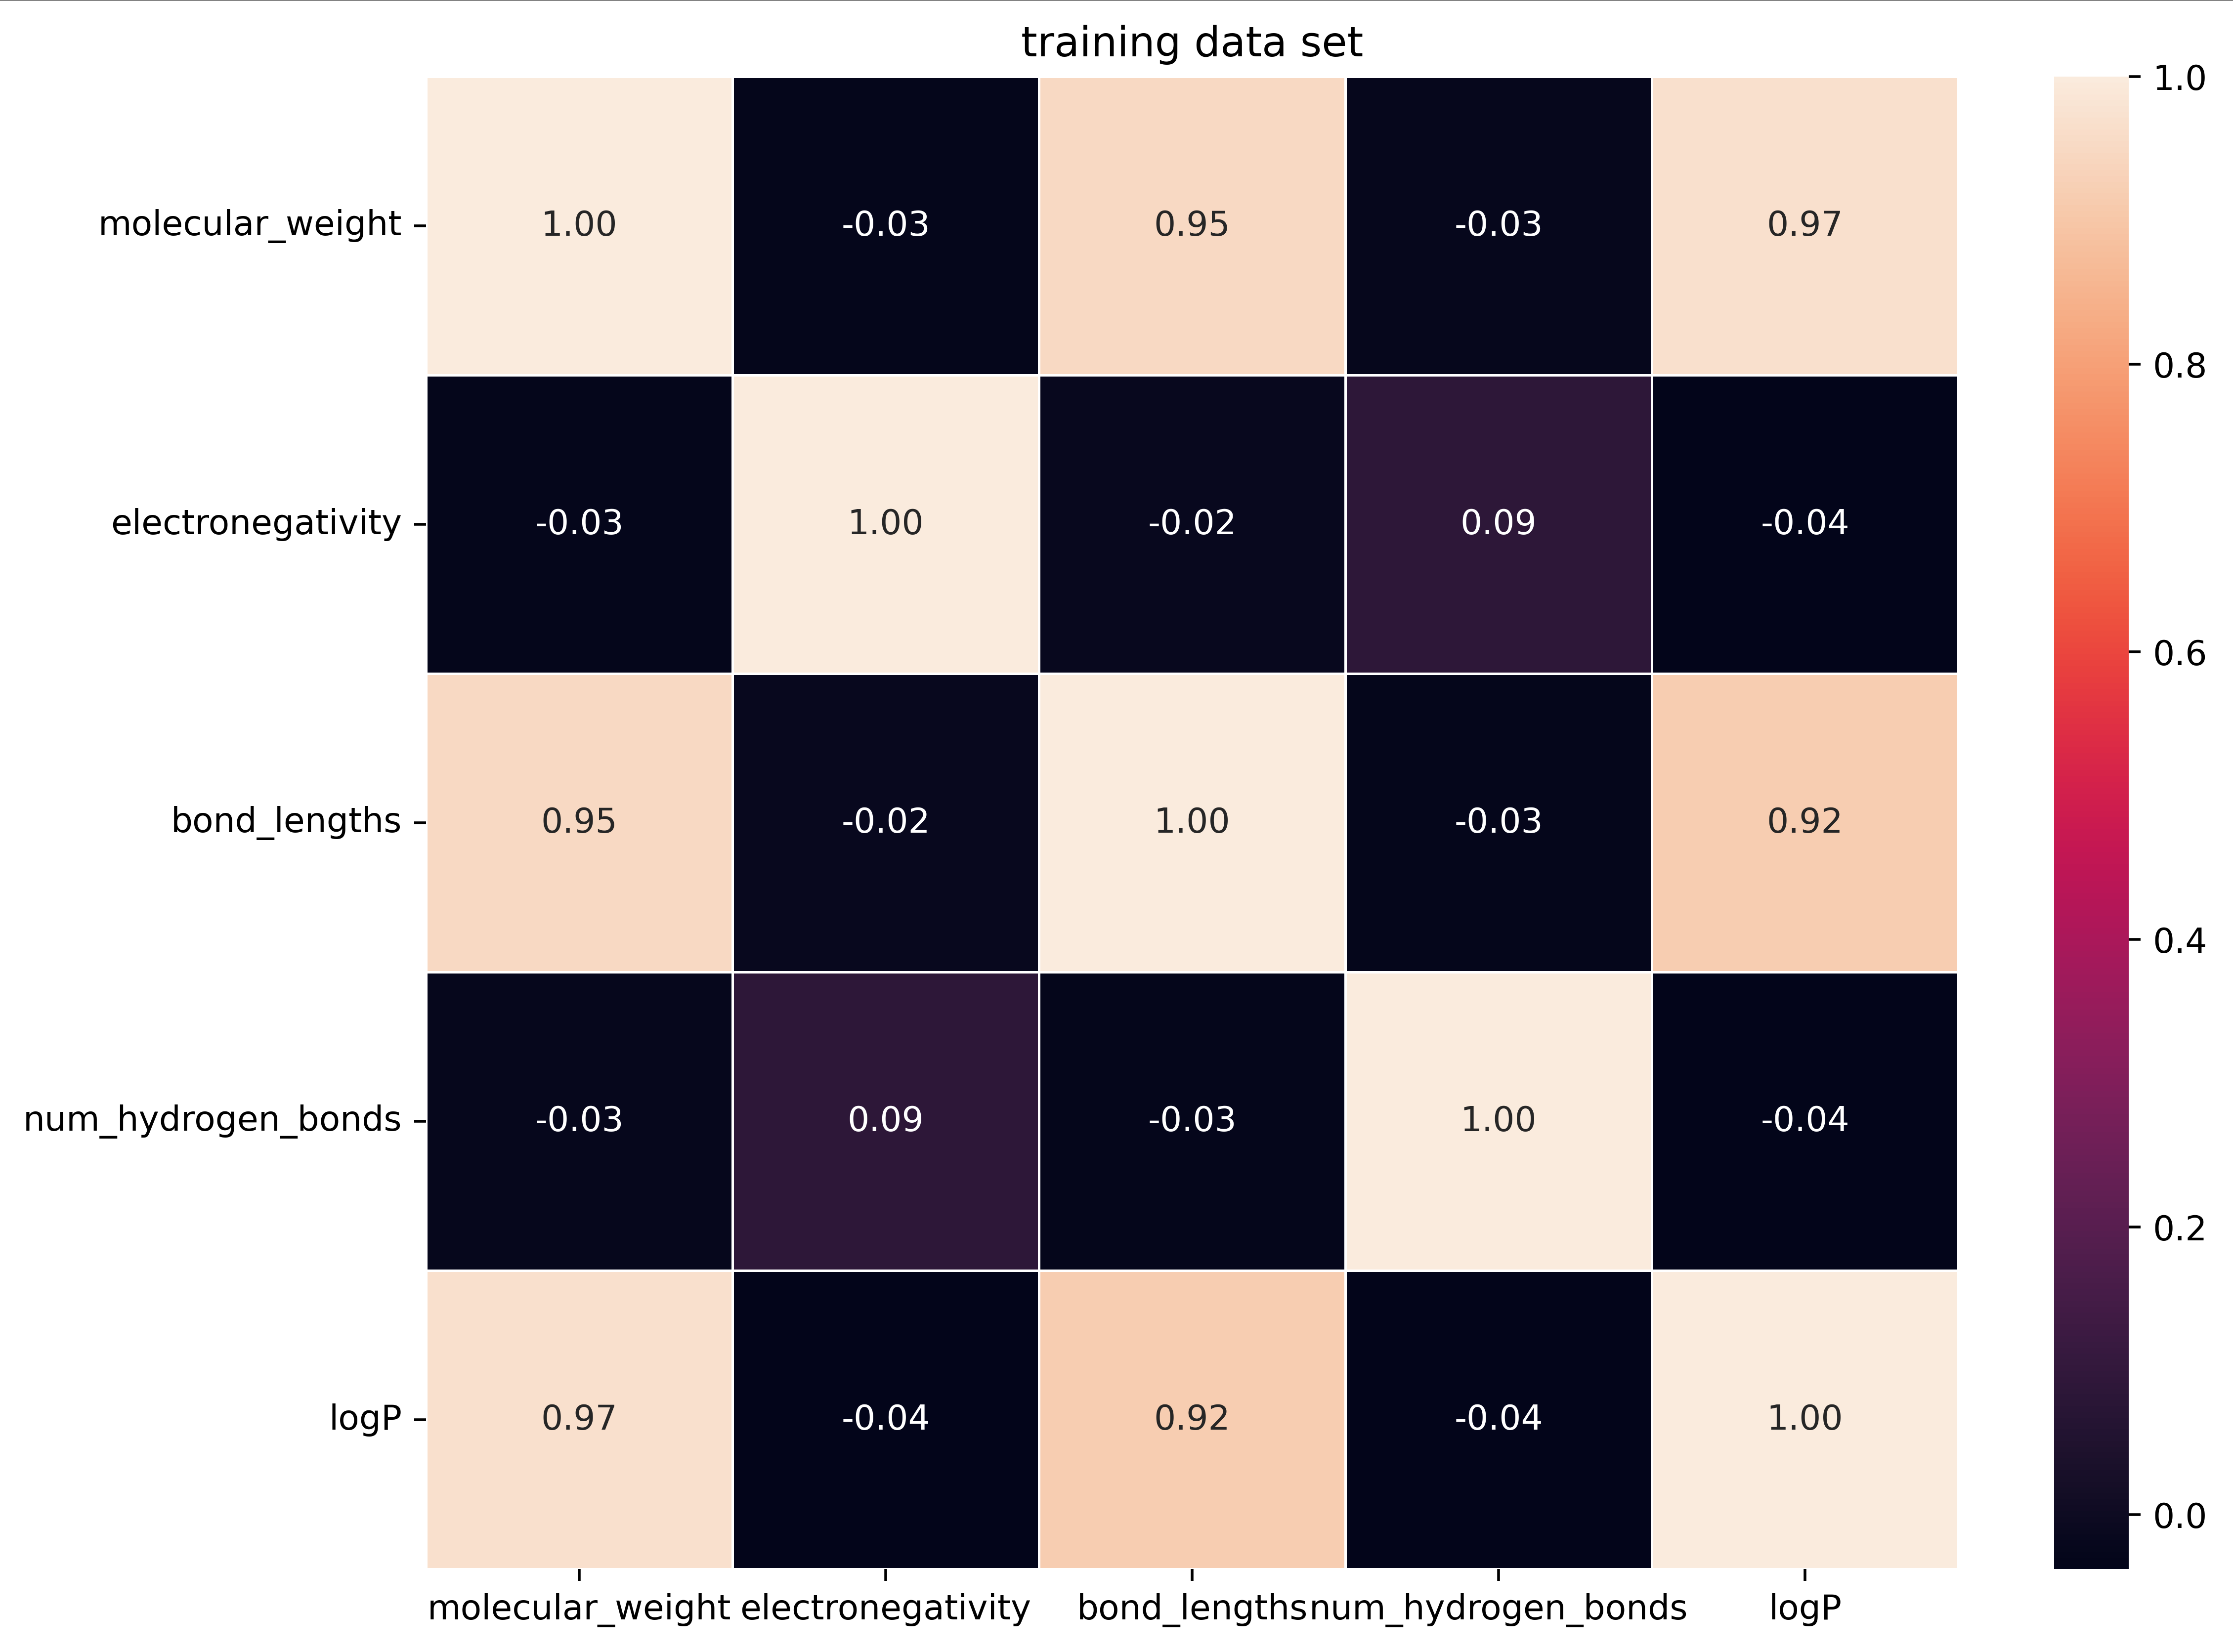

<br>

**Fig 2:**
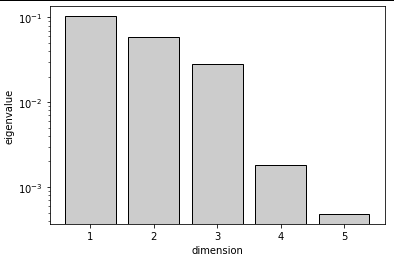

**Fig 3:**
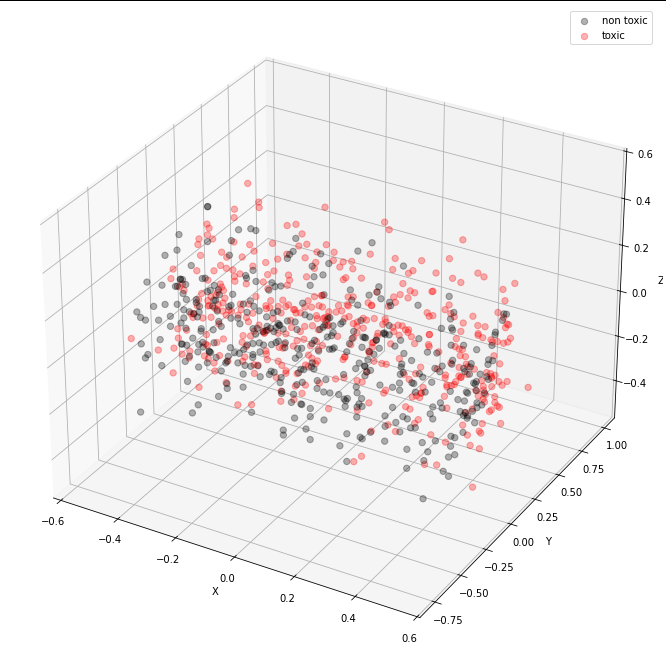